<a href="https://colab.research.google.com/github/kumbieny/kumbieny/blob/main/CNN_for_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#install tensorflow
!pip install -q tensorflow-gpu==2.9.1
import tensorflow as tf
print(tf.__version__)

2.9.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [5]:
#load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test / 255.0
y_train, y_test=y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [6]:
#number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
# building the CNN model using function API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

In [8]:
#compile and fit
#Nb: Make sure you are using the GPU for this
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 53s 33ms/step - loss: 1.5656 - accuracy: 0.4276 - val_loss: 1.2729 - val_accuracy: 0.5387
Epoch 2/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2649 - accuracy: 0.5441 - val_loss: 1.1730 - val_accuracy: 0.5782
Epoch 3/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1282 - accuracy: 0.5977 - val_loss: 0.9828 - val_accuracy: 0.6554
Epoch 4/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0267 - accuracy: 0.6344 - val_loss: 0.9590 - val_accuracy: 0.6625
Epoch 5/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9526 - accuracy: 0.6615 - val_loss: 0.9080 - val_accuracy: 0.6803
Epoch 6/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8968 - accuracy: 0.6810 - val_loss: 0.9075 - val_accuracy: 0.6782
Epoch 7/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8445 - accuracy: 0.6998 - val_loss: 0.8520 -

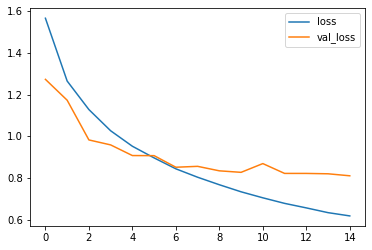

In [9]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

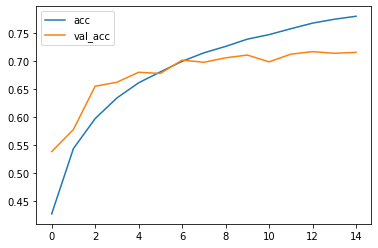

In [11]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 5s 14ms/step
Confusion matrix, without normalization
[[782  20  30  15  19   2  10  14  48  60]
 [ 15 793   8   4   4   2  16   4  17 137]
 [ 88   4 562  44 118  46  83  32  12  11]
 [ 27   7  61 467 100 145 117  50   8  18]
 [ 25   3  50  47 710  15  55  77   8  10]
 [ 14   5  49 189  78 540  48  63   7   7]
 [  5   3  31  28  37  14 866   5   7   4]
 [ 19   1  23  32  69  29  13 788   3  23]
 [ 66  39   9  11   9   9   7   6 803  41]
 [ 23  59   6  11   9   4  13   7  21 847]]


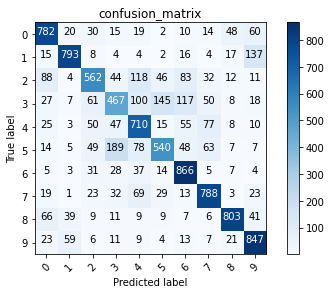

In [12]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='confusion_matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt= '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment = "center",
               color="white" if cm[i, j]> thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [16]:
#label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

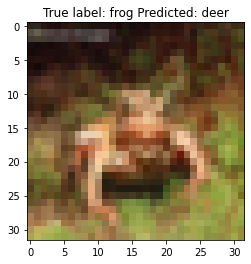

In [17]:
#show some misclassified examples
misclassified_idx = np.where(p_test !=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));